In [134]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
import math
from numpy import sqrt 

In [135]:
time = pd.read_csv("C:\Aalesh and Mandar\Datasets\AusGas.csv")

In [136]:
time.head()

,Month,GasProd
0,Jan-1956,1709
1,Feb-1956,1646
2,Mar-1956,1794
3,Apr-1956,1878
4,May-1956,2173


In [137]:
time.shape

(476, 2)

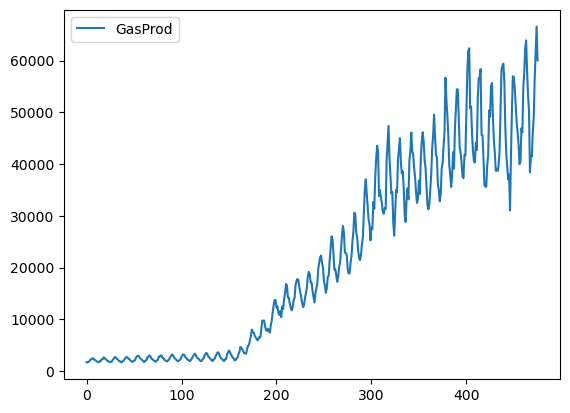

In [138]:
time.plot()
plt.show()

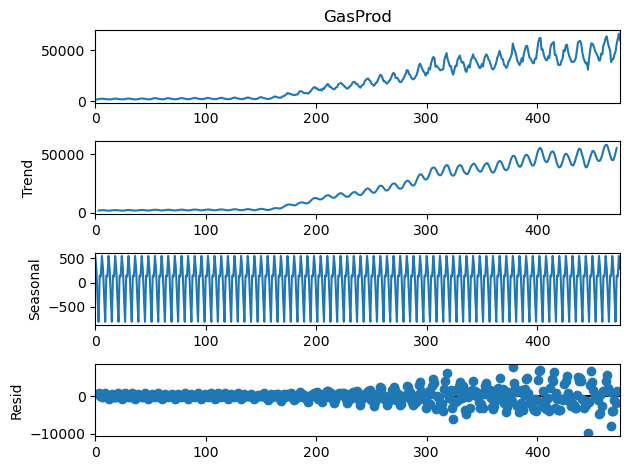

In [139]:
result = seasonal_decompose(time["GasProd"], model = "additive", period = 6)
result.plot()
plt.show()

In [140]:
y = time["GasProd"]
y_train = time["GasProd"][:-12]
y_test = time["GasProd"][-12:]

## Auto Reg

In [141]:
model = AutoReg(y_train, lags=5)
model_fit = model.fit()
print("Coefficient: " % model_fit.params)

Coefficient: 


In [142]:
pred = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)

In [143]:
error = mean_squared_error(y_test, pred)
print("Test RMSE: %0.3f" % sqrt(error))

Test RMSE: 10495.414


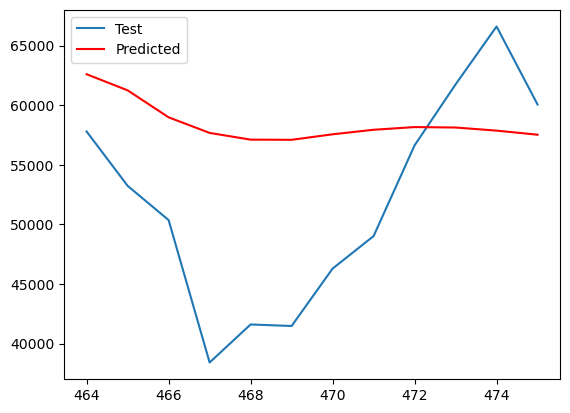

In [144]:
plt.plot(y_test, label="Test")
plt.plot(pred, color="red", label="Predicted")
plt.legend(loc="best")
plt.show()

## ARIMA

In [145]:
from statsmodels.tsa.arima.model import ARIMA

In [146]:
model = ARIMA(y_train, order = (4,1,2))
model_fit = model.fit()
print("Coefficient: " % model_fit.params)

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Coefficient: 


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [147]:
pred = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)

In [148]:
error = mean_squared_error(y_test, pred)
print("Test RMSE: %0.3f" % sqrt(error))

Test RMSE: 2679.117


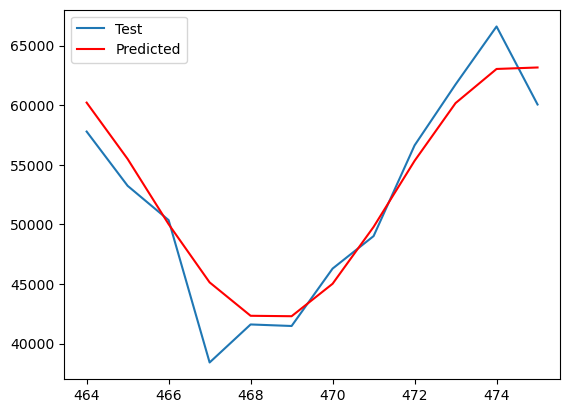

In [149]:
plt.plot(y_test, label="Test")
plt.plot(pred, color="red", label="Predicted")
plt.legend(loc="best")
plt.show()

## Auto Arima

In [150]:
from pmdarima.arima import auto_arima

In [151]:
model = auto_arima(y_train, trace = True, error_action="ignore", suppress_warnings=True)

forecast =model.predict(n_periods = len(y_test))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8355.052, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8632.352, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8589.946, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8603.593, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8631.502, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.932, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8577.053, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8325.395, Time=1.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8426.135, Time=0.80 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8271.037, Time=1.20 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8404.272, Time=0.94 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=8390.964, Time=1.27 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.27 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.14 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=8

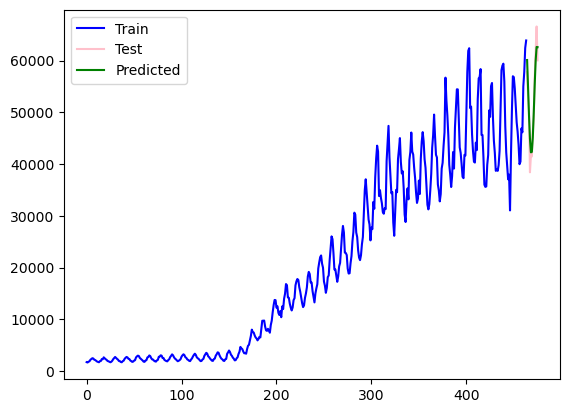

In [152]:
plt.plot(y_train, label="Train", color="blue")
plt.plot(y_test, label="Test", color="Pink")
plt.plot(forecast, color="Green", label="Predicted")
plt.legend(loc="best")
plt.show()

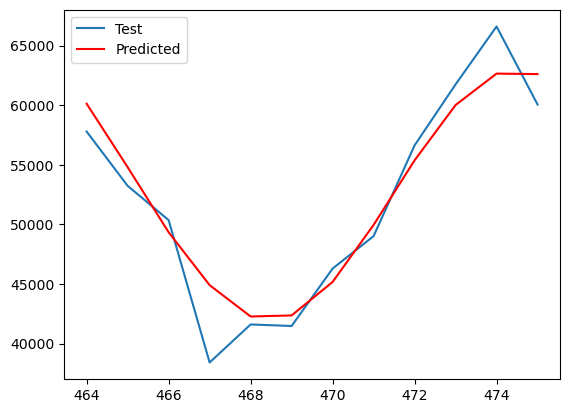

In [153]:
plt.plot(y_test, label="Test")
plt.plot(forecast, color="red", label="Predicted")
plt.legend(loc="best")
plt.show()

## SARIMA

In [154]:
from pmdarima.arima import auto_arima

In [155]:
model = auto_arima(y_train, trace = True, error_action="ignore", suppress_warnings=True, seasonal=True, m=12)

forecast =model.predict(n_periods = len(y_test))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.68 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8632.352, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8255.565, Time=0.74 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8438.509, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8631.502, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=8589.946, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.64 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=8177.113, Time=1.30 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=8438.053, Time=0.49 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=8218.666, Time=2.76 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=8230.130, Time=3.44 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=8371.138, Time=1.26 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.95 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=8219.426, Time=0.94 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

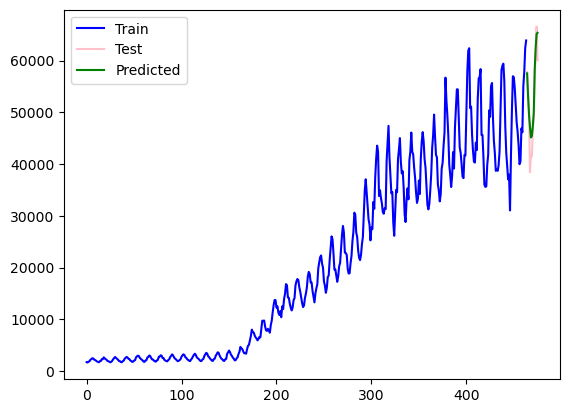

In [156]:
plt.plot(y_train, label="Train", color="blue")
plt.plot(y_test, label="Test", color="Pink")
plt.plot(forecast, color="Green", label="Predicted")
plt.legend(loc="best")
plt.show()

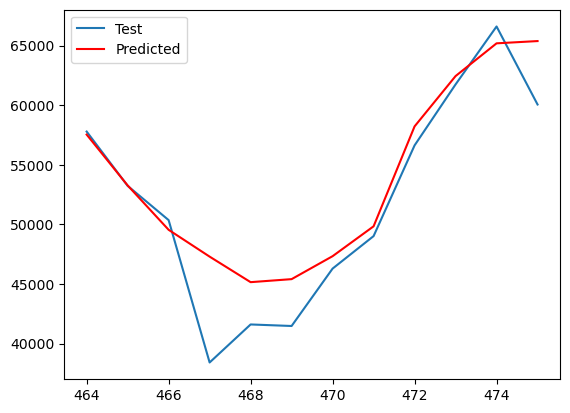

In [157]:
plt.plot(y_test, label="Test")
plt.plot(forecast, color="red", label="Predicted")
plt.legend(loc="best")
plt.show()